# 📘 Entrega Final

**Nombre del alumno:** Sanvido Gonzalo sebastian

**Comision:** 25262

## 🧩 Etapa 1: Recopilación y Preparación de Datos


###  Carga de datos

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Montar la unidad
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Verificar que los archivos csv se encuentren en la carpeta datasets
import os
os.listdir("/content/drive/MyDrive/datasets")

['ventas.csv',
 'marketing.csv',
 'clientes.csv',
 'clientes_clean.csv',
 'marketing_clean.csv',
 'ventas_clean.csv']

In [4]:
# Definimos las rutas de los datasets.

ruta_ventas = "/content/drive/MyDrive/datasets/ventas.csv"
ruta_clientes = "/content/drive/MyDrive/datasets/clientes.csv"
ruta_marketing = "/content/drive/MyDrive/datasets/marketing.csv"

# Cargamos los CSV como DataFrames.
ventas = pd.read_csv(ruta_ventas)
clientes = pd.read_csv(ruta_clientes)
marketing = pd.read_csv(ruta_marketing)

# Validamos formas para comprobar que se cargaron correctamente.
print("ventas.shape ->", ventas.shape)
print("clientes.shape ->", clientes.shape)
print("marketing.shape ->", marketing.shape)

# Mostramos las primeras filas de cada dataset para corroborar estructura de columnas.
print("-"*100)
print("ventas")
display(ventas.head(3))
print("-"*100)
print("clientes")
display(clientes.head(3))
print("-"*100)
print("marketing")
display(marketing.head(3))
print("-"*100)

ventas.shape -> (3035, 6)
clientes.shape -> (567, 5)
marketing.shape -> (90, 6)
----------------------------------------------------------------------------------------------------
ventas


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos


----------------------------------------------------------------------------------------------------
clientes


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85


----------------------------------------------------------------------------------------------------
marketing


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024


----------------------------------------------------------------------------------------------------


###  Análisis exploratorio inicial

In [5]:
def eda(df, nombre):
    print(f"=== {nombre} ===")
    print(f"Dimensiones del DataFrame: Filas={df.shape[0]}, Columnas={df.shape[1]}\n")

    print("info:")
    df.info()
    print("\n")

    print("columnas:", list(df.columns))
    print("dtypes:")
    print(df.dtypes)

    print("\nNulos por columna:")
    print(df.isna().sum())

    print("\nNulos por columna en %:")
    print( (((df.isna().sum() / df.shape[0]) * 100 ).round(2)).astype('str') +" %"  )

    print("\nDuplicados totales:")
    print(df.duplicated( keep=False ).sum())

    print("\nPrimeras filas:")
    display(df.head(3))

    print("\nDescribe (numérico):")
    display(df.describe(include='number'))
    print("-"*100)

    print("\nDescribe (categórico):")
    display(df.describe(include='object'))
    print("-"*100)

In [6]:
eda(ventas, "ventas")

=== ventas ===
Dimensiones del DataFrame: Filas=3035, Columnas=6

info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     3035 non-null   int64  
 1   producto     3035 non-null   object 
 2   precio       3033 non-null   object 
 3   cantidad     3033 non-null   float64
 4   fecha_venta  3035 non-null   object 
 5   categoria    3035 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 142.4+ KB


columnas: ['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria']
dtypes:
id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object

Nulos por columna:
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64

Nulos por columna en %:
id_venta       

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos



Describe (numérico):


,id_venta,cantidad
count,3035.000000,3033.000000
mean,1499.851400,6.496538
std,866.465379,3.457250
min,1.000000,1.000000
25%,748.500000,3.000000
50%,1502.000000,7.000000
75%,2249.500000,9.000000
max,3000.000000,12.000000


----------------------------------------------------------------------------------------------------

Describe (categórico):


,producto,precio,fecha_venta,categoria
count,3035,3033,3035,3035
unique,30,2590,364,3
top,Lámpara de mesa,$76.32,06/04/2024,Decoración
freq,181,5,24,1015


----------------------------------------------------------------------------------------------------


In [7]:
eda(clientes, "clientes")

=== clientes ===
Dimensiones del DataFrame: Filas=567, Columnas=5

info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.3+ KB


columnas: ['id_cliente', 'nombre', 'edad', 'ciudad', 'ingresos']
dtypes:
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object

Nulos por columna:
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64

Nulos por columna en %:
id_cliente    0.0 %
nombre        0.0 %
edad          0.0 %
ciudad        0.0 %
ingresos      0.0 %
dtype: object

Duplicados totales:
0

,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85



Describe (numérico):


,id_cliente,edad,ingresos
count,567.000000,567.000000,567.000000
mean,284.000000,37.940035,34668.739012
std,163.823075,10.202885,12974.531446
min,1.000000,20.000000,170.290000
25%,142.500000,30.000000,26015.240000
50%,284.000000,37.000000,35066.830000
75%,425.500000,43.000000,42457.100000
max,567.000000,81.000000,88053.010000


----------------------------------------------------------------------------------------------------

Describe (categórico):


,nombre,ciudad
count,567,567
unique,567,12
top,Micah Matis,Mar del Plata
freq,1,63


----------------------------------------------------------------------------------------------------


In [8]:
eda(marketing, "marketing")

=== marketing ===
Dimensiones del DataFrame: Filas=90, Columnas=6

info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_campanha   90 non-null     int64  
 1   producto      90 non-null     object 
 2   canal         90 non-null     object 
 3   costo         90 non-null     float64
 4   fecha_inicio  90 non-null     object 
 5   fecha_fin     90 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ KB


columnas: ['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio', 'fecha_fin']
dtypes:
id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object

Nulos por columna:
id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64

Nulos por columna en %:


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024



Describe (numérico):


,id_campanha,costo
count,90.000000,90.000000
mean,45.500000,4.928667
std,26.124701,0.947750
min,1.000000,2.950000
25%,23.250000,4.372500
50%,45.500000,4.900000
75%,67.750000,5.562500
max,90.000000,7.390000


----------------------------------------------------------------------------------------------------

Describe (categórico):


,producto,canal,fecha_inicio,fecha_fin
count,90,90,90,90
unique,30,3,78,78
top,Adorno de pared,TV,25/09/2024,05/05/2024
freq,3,30,2,3


----------------------------------------------------------------------------------------------------


###  Calidad de los datos

In [9]:

def calidad(df, nombre, clave=None):
    """
    Analiza la calidad del DataFrame:
      - Muestra cantidad de nulos por columna.
      - Cuenta filas duplicadas completas.
      - Si se indica una clave, muestra los valores duplicados más frecuentes.
    Parámetros:
      df: DataFrame de pandas que se analizará.
      nombre: texto descriptivo del DataFrame (ejemplo: 'VENTAS').
      clave: (opcional) nombre de la columna para buscar duplicados específicos.
    """

    # -------------------------------------------------
    # Mostrar título descriptivo con el nombre del DF
    # -------------------------------------------------
    print(f"### {nombre}")

    # -------------------------------------------------
    # Mostrar cantidad de valores nulos por columna
    # -------------------------------------------------
    # df.isna() devuelve un DataFrame booleano con True donde hay NaN.
    # .sum() cuenta los True (o sea, los nulos) por columna.
    # .to_frame("nulos") convierte el resultado en un DataFrame con una columna llamada 'nulos'.
    display(df.isna().sum().to_frame("nulos"))

    # -------------------------------------------------
    # Contar filas duplicadas completas
    # -------------------------------------------------
    # df.duplicated(keep=False) marca como True todas las filas que tienen otra igual.
    # keep=False significa que marca todas las copias, no solo una.
    # .sum() cuenta cuántas filas están repetidas.
    dup_rows = df.duplicated(keep=False).sum()
    print("Filas duplicadas (exactas):", dup_rows)

    # -------------------------------------------------
    # Si se especificó una columna clave válida, analizar duplicados por esa columna
    # -------------------------------------------------
    # if clave analiza que clave no sea None
    # and (y)
    if clave and clave in df.columns:
    # clave in df.columns-- >que clave sea una columna existente dentro de las columnas del dataframe
    # si no le paso ninguna columna no va a querer encontrar duplicados por columna
    # y si me equivoco y le paso una columna que no existe en el dataframe, tampoco ingresara al if.
        # Contar cuántas filas tienen valores repetidos en esa columna
        dup_key = df[clave].duplicated(keep=False).sum()
        print(f"Duplicados por clave '{clave}':", dup_key)

        # Si existen duplicados, mostrar cuáles son los valores más repetidos
        if dup_key > 0:
            # Filtrar filas donde esa clave esté duplicada
            # df[clave].duplicated(keep=False) devuelve True donde el valor se repite
            duplicados_ordenados = (
                df[df[clave].duplicated(keep=False)][clave]
                .value_counts()                # Cuenta cuántas veces aparece cada valor
                .sort_values(ascending=False)   # Ordena de mayor a menor (más duplicados arriba)
            )

            print("\n🔁 Top valores duplicados más frecuentes:")
            # Mostrar solo los primeros 10 (los más repetidos)
            display(duplicados_ordenados.head(10))
        else:
            print(f"No se encontraron duplicados en la clave '{clave}'.")
    else:
        # Si la clave no fue pasada o no existe en el DataFrame
        if clave:
            print(f"La clave '{clave}' no existe en el DataFrame.")
        else:
            print("No se indicó una clave para analizar duplicados por columna.")
#fin de def calidad


In [10]:
calidad(ventas, "ventas", "id_venta")

### ventas


,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


Filas duplicadas (exactas): 70
Duplicados por clave 'id_venta': 70

🔁 Top valores duplicados más frecuentes:


,count
id_venta,
56,2
421,2
424,2
1868,2
2545,2
2778,2
145,2
300,2
439,2


In [11]:
calidad(clientes, "clientes", "id_cliente")

### clientes


,nulos
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


Filas duplicadas (exactas): 0
Duplicados por clave 'id_cliente': 0
No se encontraron duplicados en la clave 'id_cliente'.


In [12]:
calidad(marketing,"marketing","id_campanha")

### marketing


,nulos
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0


Filas duplicadas (exactas): 0
Duplicados por clave 'id_campanha': 0
No se encontraron duplicados en la clave 'id_campanha'.


## 🧹 Etapa 2: Preprocesamiento y Limpieza de Datos


###  Limpieza de datos

In [13]:
ventas_clean = ventas.copy( deep =True )
clientes_clean = clientes.copy(deep =True)
marketing_clean = marketing.copy(deep =True)

In [14]:
ventas_clean = ventas_clean.drop_duplicates()

In [15]:
eliminados = ventas.shape[0] - ventas_clean.shape[0]

print(f"Se eliminaron {eliminados} filas duplicadas en ventas_clean.")

Se eliminaron 35 filas duplicadas en ventas_clean.


In [16]:
def normalizar_texto(df):
    for col in df.select_dtypes(include="object").columns:
        # Se agrupan las operaciones entre paréntesis () para escribirlas en varias líneas
        # Python evalúa todo el bloque como una única expresión.
        df[col] = (
            df[col]
            .astype(str)                              # Convierte cualquier tipo a string
            # .astype(str)  → convierte todo a texto; no tiene parámetros adicionales.
            .str.strip()                               # Elimina espacios al inicio y final
            # .str.strip() no necesita argumentos; borra espacios en blanco por defecto.
            .str.replace(r"[\u200b\t\r\n]", "", regex=True)
            # .str.replace(patron, reemplazo, regex=True)
            #   patron: expresión regular que busca caracteres invisibles (\u200b, tabulaciones, saltos)
            #   reemplazo: ""  → los elimina
            #   regex=True indica que 'patron' es una expresión regular.
            .str.replace(" +", " ", regex=True)
            # reemplaza "uno o más espacios consecutivos" por un solo espacio
            .str.title()                               # Convierte a Título: "juan pérez" → "Juan Pérez"
        )

        #df[col] = df[col].astype(str).str.strip().str.replace(r"[\u200b\t\r\n]", "", regex=True).str.replace(" +", " ", regex=True).str.title()
    return df

In [17]:
lista_df = [ventas_clean, clientes_clean, marketing_clean]
lista_df_nombre = ["ventas","cliente","marketing"]

In [18]:
# formato fecha
for df in lista_df:
    for col in df.columns:
        if "fecha" in col.lower():  # detecta columnas con la palabra "fecha"
            df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=True)

In [19]:


for df,nombre in zip(lista_df,lista_df_nombre):
    print(f'df {nombre.upper()} \n')
    print(df.dtypes)
    print("-"*100)

df VENTAS 

id_venta                int64
producto               object
precio                 object
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object
----------------------------------------------------------------------------------------------------
df CLIENTE 

id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object
----------------------------------------------------------------------------------------------------
df MARKETING 

id_campanha              int64
producto                object
canal                   object
costo                  float64
fecha_inicio    datetime64[ns]
fecha_fin       datetime64[ns]
dtype: object
----------------------------------------------------------------------------------------------------


In [20]:
ventas_clean = normalizar_texto(ventas_clean)
clientes_clean = normalizar_texto(clientes_clean)
marketing_clean = normalizar_texto(marketing_clean)

In [21]:
ventas_clean.head(3)

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro Decorativo,$69.94,5.0,2024-01-02,Decoración
1,811,Lámpara De Mesa,$105.10,5.0,2024-01-02,Decoración
2,1156,Secadora,$97.96,3.0,2024-01-02,Electrodomésticos


In [22]:
if "precio" in ventas_clean.columns:
    # convierto a texto, aplico funciones de texto replace sin expresion regular, quito espacios
    ventas_clean["precio"] = ventas_clean["precio"]\
      .astype(str)\
      .str.replace("$", "", regex=False)\
      .str.replace(",", "", regex=False)\
      .str.strip()



In [23]:
ventas_clean["precio"] = pd.to_numeric(ventas_clean["precio"], errors="coerce")

In [24]:
# convierto a entero las cantidades
if "cantidad" in ventas_clean.columns:
    ventas_clean["cantidad"] = pd.to_numeric( ventas_clean["cantidad"], errors="coerce")\
    .astype("Int64")

In [25]:
ventas_clean.isna().sum()

,0
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


In [26]:
# busco los nulos
mask = (ventas_clean["precio"].isna()) | (ventas_clean["cantidad"].isna())
ventas_clean[mask]

,id_venta,producto,precio,cantidad,fecha_venta,categoria
136,627,Elementos De Cerámica,NaN,<NA>,2024-01-17,Decoración
139,2171,Parlantes Bluetooth,NaN,<NA>,2024-01-17,Electrónica


In [27]:
# elimino los nulos, son dos regitros
ventas_clean = ventas_clean.dropna(axis= 0 )

In [28]:
for df,nombre in zip(lista_df,lista_df_nombre):
    print(f'df {nombre.upper()} \n')
    print(df.dtypes)
    print("-"*100)

df VENTAS 

id_venta                int64
producto               object
precio                float64
cantidad                Int64
fecha_venta    datetime64[ns]
categoria              object
dtype: object
----------------------------------------------------------------------------------------------------
df CLIENTE 

id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object
----------------------------------------------------------------------------------------------------
df MARKETING 

id_campanha              int64
producto                object
canal                   object
costo                  float64
fecha_inicio    datetime64[ns]
fecha_fin       datetime64[ns]
dtype: object
----------------------------------------------------------------------------------------------------


In [29]:
ventas_clean.to_csv("/content/drive/MyDrive/datasets/ventas_clean.csv", index=False)
clientes_clean.to_csv("/content/drive/MyDrive/datasets/clientes_clean.csv", index=False)
marketing_clean.to_csv("/content/drive/MyDrive/datasets/marketing_clean.csv", index=False)

print("✅ Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv")

✅ Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv


In [30]:
def reporte_calidad_global(dfs, nombres):
    """
    Crea un resumen de calidad de varios DataFrames.

    Parámetros:
      dfs: lista de DataFrames (por ejemplo [ventas_clean, clientes_clean, marketing_clean])
      nombres: lista de nombres correspondientes (["VENTAS", "CLIENTES", "MARKETING"])
    """
    resumen = []
    #zip-->es una función incorporada de Python que une elementos de dos (o más) iterables
    # —por ejemplo, listas, tuplas o cualquier objeto iterable— en pares ordenados.
    for df, nombre in zip(dfs, nombres):
        nulos = df.isna().sum().sum()                    # Total de valores nulos, no por columnas sino total, por eso el doble sum
        duplicados = df.duplicated(keep=False).sum()     # Total de filas duplicadas
        columnas = len(df.columns)                       # Cantidad de columnas
        filas = len(df)                                  # Cantidad de registros

        resumen.append({
            "Dataset": nombre,
            "Filas": filas,
            "Columnas": columnas,
            "Nulos totales": nulos,
            "Duplicados": duplicados,
                        })

    reporte = pd.DataFrame(resumen)
    #display(reporte)
    return reporte

In [31]:
lista_df_original = [ventas, clientes, marketing]
lista_df_nombre_original = ["ventas original","cliente original","marketing original"]

lista_df_limpios = [ventas_clean, clientes_clean, marketing_clean]
lista_df_nombre_limpios = ["ventas limpio","cliente limpio","marketing limpio"]


In [32]:
print(reporte_calidad_global(lista_df_original, lista_df_nombre_original))


              Dataset  Filas  Columnas  Nulos totales  Duplicados
0     ventas original   3035         6              4          70
1    cliente original    567         5              0           0
2  marketing original     90         6              0           0


In [33]:
print(reporte_calidad_global(lista_df_limpios,lista_df_nombre_limpios))

            Dataset  Filas  Columnas  Nulos totales  Duplicados
0     ventas limpio   2998         6              0           0
1    cliente limpio    567         5              0           0
2  marketing limpio     90         6              0           0


In [34]:
def comparacion_columnas(df1, df2, nombres):
    """
    Compara las columnas de dos DataFrames y muestra las que son diferentes."""
    df =pd.concat([df1.dtypes, df2.dtypes], axis=1)
    df.columns = [nombres[0], nombres[1]]
    df['diferencia'] = np.where(df[nombres[0]] != df[nombres[1]], "Diferente", "Igual")
    return df



In [35]:
comparacion_columnas(ventas, ventas_clean, ["ventas", "ventas_clean"])

,ventas,ventas_clean,diferencia
id_venta,int64,int64,Igual
producto,object,object,Igual
precio,object,float64,Diferente
cantidad,float64,Int64,Diferente
fecha_venta,object,datetime64[ns],Diferente
categoria,object,object,Igual


In [36]:
comparacion_columnas(clientes, clientes_clean, ["clientes", "clientes_clean"])

,clientes,clientes_clean,diferencia
id_cliente,int64,int64,Igual
nombre,object,object,Igual
edad,int64,int64,Igual
ciudad,object,object,Igual
ingresos,float64,float64,Igual


In [37]:
comparacion_columnas(marketing, marketing_clean, ["marketing", "marketing_clean"])

,marketing,marketing_clean,diferencia
id_campanha,int64,int64,Igual
producto,object,object,Igual
canal,object,object,Igual
costo,float64,float64,Igual
fecha_inicio,object,datetime64[ns],Diferente
fecha_fin,object,datetime64[ns],Diferente


###  Transformación de datos

In [38]:
ventas_clean.head(3)

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro Decorativo,69.94,5,2024-01-02,Decoración
1,811,Lámpara De Mesa,105.10,5,2024-01-02,Decoración
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos


In [39]:
ventas_perf = ventas_clean.copy(deep=True)



In [40]:
ventas_perf['ingreso'] = ventas_perf.loc[:,'precio'] * ventas_perf.loc[:,'cantidad']
ventas_perf.head(3)

,id_venta,producto,precio,cantidad,fecha_venta,categoria,ingreso
0,792,Cuadro Decorativo,69.94,5,2024-01-02,Decoración,349.7
1,811,Lámpara De Mesa,105.10,5,2024-01-02,Decoración,525.5
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos,293.88


In [41]:
resumen_prod = (
    ventas_perf
    # 1) Agrupamos el DataFrame por una o varias columnas clave
    .groupby(
        by="producto",    # Columna (str) o lista de columnas (list[str]) que define los grupos.
        dropna=False,   # False → NO descarta filas donde la clave de grupo tenga NaN; crea un grupo para NaN.
        as_index=False, # False → las columnas de agrupación quedan como columnas normales (no pasan al índice).
        observed=False  # Solo aplica si 'prod_col' es Categorical:
                        #   False → incluye categorías NO observadas (posibles pero sin filas);
                        #   True  → solo categorías que aparecen en los datos (más rápido y “compacto”).
    )
    # 2) Agregamos (resumimos) columnas numéricas por cada grupo
    .agg(
        ingreso_total=('ingreso', 'sum'),   # Suma de 'ingreso' por grupo (skipna=True por defecto).
        unidades=('cantidad', 'sum'),       # Suma de 'cantidad' por grupo.
        precio_promedio=('precio', 'mean'), # Promedio simple de 'precio' por grupo (ignora NaN).
        registros=('ingreso', 'size')       # Número de filas en el grupo (cuenta TODO, incluso NaN).
    )
    .sort_values(by='ingreso_total', ascending=False)
)

In [42]:
display(resumen_prod.head(20).sort_values(by='ingreso_total', ascending=False))

,producto,ingreso_total,unidades,precio_promedio,registros
19,Lámpara De Mesa,82276.38,1112,72.720625,176
3,Auriculares,74175.58,958,76.302727,143
20,Microondas,72562.89,912,79.176000,135
5,Cafetera,59607.31,765,79.046581,117
9,Cuadro Decorativo,54297.6,726,74.578000,100
26,Smartphone,54132.44,665,81.398416,101
25,Secadora,52115.45,696,73.338900,100
16,Jarrón Decorativo,51130.88,672,74.534000,100
4,Batidora,50979.2,672,77.537200,100
24,Rincón De Plantas,50456.45,691,74.823861,101


In [43]:

# calculo del percentil 80
p80_ingreso = resumen_prod["ingreso_total"].quantile(
    q=0.80,                # q indica el percentil deseado (0.80 = 80% de los datos por debajo)
    interpolation="linear" # si el percentil no coincide exactamente con un valor real del dataset,
                           # 'linear' interpola entre los dos valores vecinos.
                           # Ejemplo: si el 80% cae entre 4000 y 5000,
                           # calcula un valor proporcional, por ejemplo 4200.
                           # Otros métodos posibles:
                           #  - 'lower': toma el menor de los dos valores (4000)
                           #  - 'higher': toma el mayor (5000)
                           #  - 'nearest': el más cercano al percentil
                           #  - 'midpoint': el punto medio exacto (4500)
)

In [44]:
# filtrar los productos con ingresos mayore3s que el percentil 80
ventas_top = (
    resumen_prod
    # ---------------------------------------------------------------
    # .query(expr, *, inplace=False, engine='python'|'numexpr')
    #   - Aplica un filtro usando una expresión estilo SQL-simple.
    #   - `expr` es un string que se evalúa sobre los nombres de las columnas.
    #   - Para usar variables de Python (no columnas), se antepone '@' (ej.: @p80_ingreso).
    #   - NaN en comparaciones (>, >=, ==, etc.) se comportan como False → esas filas no pasan el filtro.
    #   - engine='python': interpreta la expresión con Python puro (compatible siempre).
    #   - engine='numexpr': si está instalado, acelera operaciones numéricas vectorizadas.
    #   - inplace: False (por defecto) devuelve un DF nuevo; True modifica el DF original (menos recomendado en cadenas).
    .query(
        "ingreso_total >= @p80_ingreso",  # expr: filtra filas donde ingreso_total es al menos el umbral del P80
        engine="python"                   # motor de evaluación (usar 'numexpr' si lo tenés y querés performance)
        # Notas de sintaxis de `expr`:
        #   • Operadores lógicos: and / or / not   (también valen &, |, ~ con paréntesis).
        #   • Strings deben ir entre comillas: canal == 'Online'
        #   • Columnas con espacios o caracteres raros: usar `backticks`, ej.: `nombre producto` == 'X'
        #   • Ejemplos:
        #       "ingreso_total >= @p80_ingreso and unidades >= 10"
        #       "`nombre producto`.str.contains('Promo')"
        #       "precio_promedio.between(1000, 3000, inclusive='both')"
    )
    # ---------------------------------------------------------------
    # .sort_values(by, axis=0, ascending=True|[...], inplace=False,
    #              kind='quicksort'|'mergesort'|'heapsort'|'stable',
    #              na_position='last'|'first', ignore_index=False, key=None)
    #   - Ordena por una o varias columnas.
    #   - `by`: str o lista de str con las columnas a ordenar.
    #   - `ascending`: bool o lista de bool (una por cada columna en `by`).
    #   - `na_position`: dónde ubicar NaN ('last' o 'first').
    #   - `ignore_index`: si True, reasigna el índice 0..n-1 en el resultado.
    #   - `kind`: algoritmo de ordenamiento (mergesort es estable si necesitás preservar empates).
    #   - `key`: función que transforma los valores antes de ordenar (p. ej., key=lambda s: s.str.normalize(...)).
    .sort_values(
        by=["ingreso_total", "unidades"],  # primero ordena por ingreso_total, luego desempata por unidades
        ascending=[False, False],          # ambos en orden descendente (mayor → menor)
        na_position="last",                # coloca NaN al final (útil si alguna métrica quedó en NaN)
        ignore_index=False                  # reindexa el resultado secuencialmente (0..n-1)
        # Variantes útiles:
        #   • ascending=True                 # orden ascendente
        #   • ascending=[False, True]        # primero desc, luego asc para el segundo criterio
        #   • kind='mergesort'               # orden estable (respeta el orden de aparición en empates)
        #   • key=lambda s: s.str.lower()    # ordenar texto sin distinción de mayúsculas/minúsculas
    )
)

In [45]:
print(f"Umbral (percentil 80) de ingreso_total: {float(p80_ingreso):,.2f}")
print("✅ Productos de ALTO RENDIMIENTO :")
display(ventas_top)

Umbral (percentil 80) de ingreso_total: 52,518.85
✅ Productos de ALTO RENDIMIENTO :


,producto,ingreso_total,unidades,precio_promedio,registros
19,Lámpara De Mesa,82276.38,1112,72.720625,176
3,Auriculares,74175.58,958,76.302727,143
20,Microondas,72562.89,912,79.176000,135
5,Cafetera,59607.31,765,79.046581,117
9,Cuadro Decorativo,54297.6,726,74.578000,100
26,Smartphone,54132.44,665,81.398416,101


In [46]:
# total de ingresos de los productos de alto rendimiento
ingresos_superiores = ventas_top['ingreso_total'].sum()
# total de ingresos
total_ingresos = resumen_prod['ingreso_total'].sum()
# calculo de porcentaje, cuanto representan
porcentaje_ingresos = (ingresos_superiores / total_ingresos) * 100
print(f"El porcentaje de ingresos superiores al percentil 80 es: {porcentaje_ingresos:.2f}%")

El porcentaje de ingresos superiores al percentil 80 es: 27.06%


In [47]:
cantidad_productos = resumen_prod.shape[0]
print(f"La cantidad total de productos es: {cantidad_productos}")

La cantidad total de productos es: 30


In [48]:
cantidad_productos_alto_rendimiento = ventas_top.shape[0]
print(f"La cantidad de productos con ingresos superiores al percentil 80 es: {cantidad_productos_alto_rendimiento}")
print(f"El porcentaje de productos con ingresos superiores al percentil 80 es: {(cantidad_productos_alto_rendimiento/cantidad_productos)*100:.2f}%")

La cantidad de productos con ingresos superiores al percentil 80 es: 6
El porcentaje de productos con ingresos superiores al percentil 80 es: 20.00%


In [49]:
# agregar columnas, total acumulado sobre los productos ordenados en orden decreciente por total de ventas
resumen_prod['total_acumulado']= resumen_prod['ingreso_total'].cumsum()
# agregar columna total general de ventas
resumen_prod['total_general'] = resumen_prod['ingreso_total'].sum()
# porcentaje acumulado en porcentaje
resumen_prod['porcentaje_acumulado'] = ((resumen_prod['total_acumulado'] / resumen_prod['total_general']) * 100).round(2)
resumen_prod.head(30)

,producto,ingreso_total,unidades,precio_promedio,registros,total_acumulado,total_general,porcentaje_acumulado
19,Lámpara De Mesa,82276.38,1112,72.720625,176,82276.38,1467093.52,5.61
3,Auriculares,74175.58,958,76.302727,143,156451.96,1467093.52,10.66
20,Microondas,72562.89,912,79.176000,135,229014.85,1467093.52,15.61
5,Cafetera,59607.31,765,79.046581,117,288622.16,1467093.52,19.67
9,Cuadro Decorativo,54297.6,726,74.578000,100,342919.76,1467093.52,23.37
26,Smartphone,54132.44,665,81.398416,101,397052.2,1467093.52,27.06
25,Secadora,52115.45,696,73.338900,100,449167.65,1467093.52,30.62
16,Jarrón Decorativo,51130.88,672,74.534000,100,500298.53,1467093.52,34.1
4,Batidora,50979.2,672,77.537200,100,551277.73,1467093.52,37.58
24,Rincón De Plantas,50456.45,691,74.823861,101,601734.18,1467093.52,41.02


In [50]:
# mascara booleana, los mejores productos que representan el 80 % de las ventas
mask = resumen_prod['porcentaje_acumulado'] < 80

In [51]:
cantidad_productos_alto_rendimiento_2 = resumen_prod[mask].shape[0]

In [52]:
print(f"El 80 % de los ingresos es generado por : {(cantidad_productos_alto_rendimiento_2/cantidad_productos)*100:.2f} % de los productos")

El 80 % de los ingresos es generado por : 70.00 % de los productos


###  Agregación

In [53]:
ventas_perf.head(3)

,id_venta,producto,precio,cantidad,fecha_venta,categoria,ingreso
0,792,Cuadro Decorativo,69.94,5,2024-01-02,Decoración,349.7
1,811,Lámpara De Mesa,105.10,5,2024-01-02,Decoración,525.5
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos,293.88


In [54]:
# agrupacion por categorias y saco agregaciones

ventas_cat = ventas_perf.copy(deep=True )

ventas_cat = ventas_cat.groupby(by='categoria', as_index=False)\
  .agg(ingreso_total=('ingreso', 'sum'), unidades=('cantidad', 'sum'), precio_promedio=('precio', 'mean'), registros=('ingreso', 'size'))\
  .sort_values(by='ingreso_total', ascending=False)

ventas_cat.head(3)

,categoria,ingreso_total,unidades,precio_promedio,registros
1,Electrodomésticos,505299.63,6592,76.52096,1000
2,Electrónica,482577.8,6413,75.25492,998
0,Decoración,479216.09,6490,74.09800,1000


In [55]:
# agregamos una columna de ticket promedio por categoria
ventas_cat['ticket_promedio_por_venta'] = ventas_cat['ingreso_total'] / ventas_cat['registros']
ventas_cat.head(3)

,categoria,ingreso_total,unidades,precio_promedio,registros,ticket_promedio_por_venta
1,Electrodomésticos,505299.63,6592,76.52096,1000,505.29963
2,Electrónica,482577.8,6413,75.25492,998,483.54489
0,Decoración,479216.09,6490,74.09800,1000,479.21609


In [56]:
ventas_tiempo = ventas_perf.copy(deep=True )

In [57]:

# crear columnas de fecha para analizar las ventas por año y mes
ventas_tiempo['año'] = ventas_tiempo['fecha_venta'].dt.year
ventas_tiempo['mes'] = ventas_tiempo['fecha_venta'].dt.month
ventas_tiempo['dia'] = ventas_tiempo['fecha_venta'].dt.day_name()
ventas_tiempo.head()



,id_venta,producto,precio,cantidad,fecha_venta,categoria,ingreso,año,mes,dia
0,792,Cuadro Decorativo,69.94,5,2024-01-02,Decoración,349.7,2024,1,Tuesday
1,811,Lámpara De Mesa,105.10,5,2024-01-02,Decoración,525.5,2024,1,Tuesday
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos,293.88,2024,1,Tuesday
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos,914.8,2024,1,Tuesday
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos,424.84,2024,1,Tuesday


In [58]:
# ventas por año y mes, ordenadas ascendente
resumen_prod_2 = ventas_tiempo.groupby(by=['año','mes'], as_index=False).agg(total_ventas = ('ingreso', 'sum')).sort_values(by=['año','mes'], ascending=[True,True])
resumen_prod_2

,año,mes,total_ventas
0,2024,1,129604.99
1,2024,2,118672.44
2,2024,3,136779.15
3,2024,4,128430.69
4,2024,5,143727.25
5,2024,6,108480.17
6,2024,7,116229.97
7,2024,8,119680.15
8,2024,9,115787.85
9,2024,10,112117.13


In [59]:
# porcentaje acumulado de las ventas en %
resumen_prod_2['como %'] = (resumen_prod_2['total_ventas'] / resumen_prod_2['total_ventas'].sum() * 100).round(2)
resumen_prod_2

,año,mes,total_ventas,como %
0,2024,1,129604.99,8.83
1,2024,2,118672.44,8.09
2,2024,3,136779.15,9.32
3,2024,4,128430.69,8.75
4,2024,5,143727.25,9.8
5,2024,6,108480.17,7.39
6,2024,7,116229.97,7.92
7,2024,8,119680.15,8.16
8,2024,9,115787.85,7.89
9,2024,10,112117.13,7.64


In [60]:
# ventas por dia de la semana
resumen_prod_3 = ventas_tiempo.groupby(by=['dia']).agg(total_ventas = ('ingreso', 'sum')).sort_values(by='total_ventas', ascending=False)
resumen_prod_3

,total_ventas
dia,
Thursday,220610.75
Wednesday,220477.42
Sunday,219720.77
Saturday,215017.9
Tuesday,200745.02
Monday,199054.71
Friday,191466.95


In [61]:
# mayor venta es los jueves y miercoles
resumen_prod_3['como %'] = (resumen_prod_3['total_ventas'] / resumen_prod_3['total_ventas'].sum() * 100).round(2)
resumen_prod_3

,total_ventas,como %
dia,,
Thursday,220610.75,15.04
Wednesday,220477.42,15.03
Sunday,219720.77,14.98
Saturday,215017.9,14.66
Tuesday,200745.02,13.68
Monday,199054.71,13.57
Friday,191466.95,13.05


In [62]:
resumen_prod_3['ventas_acumuladas % '] = resumen_prod_3['como %'].cumsum()
resumen_prod_3

,total_ventas,como %,ventas_acumuladas %
dia,,,
Thursday,220610.75,15.04,15.04
Wednesday,220477.42,15.03,30.07
Sunday,219720.77,14.98,45.05
Saturday,215017.9,14.66,59.71
Tuesday,200745.02,13.68,73.39
Monday,199054.71,13.57,86.96
Friday,191466.95,13.05,100.01


In [63]:
# el intervalo de fechas
print(f'el intervalo de fechas va desde el año {ventas_tiempo['año'].min()} mes  {ventas_tiempo['mes'].min()} hasta el año {ventas_tiempo['año'].max()} mes  {ventas_tiempo['mes'].max()}')


el intervalo de fechas va desde el año 2024 mes  1 hasta el año 2024 mes  12


## ETAPA 2: Integración de Datos: Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.

In [64]:
#agrupo el df de ventas clean por producto y sum la cantidad por el precio
df_ventas_x_producto = ventas_clean.groupby('producto').agg(
    precio_por_cantidad=('precio', lambda x: (x * ventas_clean.loc[x.index, 'cantidad']).sum() )
)

# Ordeno por producto de forma ascendente
df_ventas_x_producto = df_ventas_x_producto.sort_values(by='producto', ascending=True)

# muestro resultado
display(df_ventas_x_producto)

,precio_por_cantidad
producto,
Adorno De Pared,48093.49
Alfombra,44773.06
Aspiradora,50085.86
Auriculares,74175.58
Batidora,50979.20
Cafetera,59607.31
Candelabro,11128.80
Consola De Videojuegos,46174.41
Cortinas,44865.03


In [65]:
#agrupo marketing clean por producto y sumo el costo de las campañas de ese producto

df_marketing_x_producto = marketing_clean.groupby('producto')['costo'].sum().reset_index()
df_marketing_x_producto = df_marketing_x_producto[['producto', 'costo']] # Select only the desired columns
df_marketing_x_producto = df_marketing_x_producto.sort_values(by='producto', ascending=True) # Sort by product ascending
display(df_marketing_x_producto)

,producto,costo
0,Adorno De Pared,14.05
1,Alfombra,17.46
2,Aspiradora,16.46
3,Auriculares,15.24
4,Batidora,15.28
5,Cafetera,18.16
6,Candelabro,14.65
7,Consola De Videojuegos,12.77
8,Cortinas,17.36
9,Cuadro Decorativo,15.85


In [66]:
#mergeo el df agrupado por producto con el de marketing agrupado por producto por producto
merged_df = pd.merge(df_ventas_x_producto, df_marketing_x_producto, on='producto')
display(merged_df)

,producto,precio_por_cantidad,costo
0,Adorno De Pared,48093.49,14.05
1,Alfombra,44773.06,17.46
2,Aspiradora,50085.86,16.46
3,Auriculares,74175.58,15.24
4,Batidora,50979.20,15.28
5,Cafetera,59607.31,18.16
6,Candelabro,11128.80,14.65
7,Consola De Videojuegos,46174.41,12.77
8,Cortinas,44865.03,17.36
9,Cuadro Decorativo,54297.60,15.85


In [67]:
print(f' cantidad de productos {df_ventas_x_producto.shape[0]}')
print(f' cantidad de productos despues de consolidar los datos {merged_df.shape[0]}')

 cantidad de productos 30
 cantidad de productos despues de consolidar los datos 30


In [68]:
#obtengo que % me representa el costo sobre el ingreso
merged_df['porcentaje_costo_sobre_ingreso'] = (merged_df['costo'] / merged_df['precio_por_cantidad']) * 100
display(merged_df)

,producto,precio_por_cantidad,costo,porcentaje_costo_sobre_ingreso
0,Adorno De Pared,48093.49,14.05,0.029214
1,Alfombra,44773.06,17.46,0.038997
2,Aspiradora,50085.86,16.46,0.032864
3,Auriculares,74175.58,15.24,0.020546
4,Batidora,50979.20,15.28,0.029973
5,Cafetera,59607.31,18.16,0.030466
6,Candelabro,11128.80,14.65,0.131640
7,Consola De Videojuegos,46174.41,12.77,0.027656
8,Cortinas,44865.03,17.36,0.038694
9,Cuadro Decorativo,54297.60,15.85,0.029191


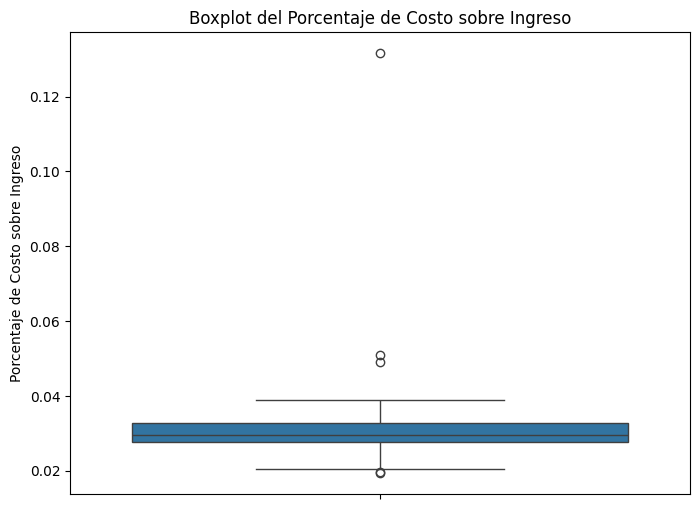

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot para ver la distribucion de los porcentajes
plt.figure(figsize=(8, 6))
sns.boxplot(y=merged_df['porcentaje_costo_sobre_ingreso'])
plt.title('Boxplot del Porcentaje de Costo sobre Ingreso')
plt.ylabel('Porcentaje de Costo sobre Ingreso')
plt.show()

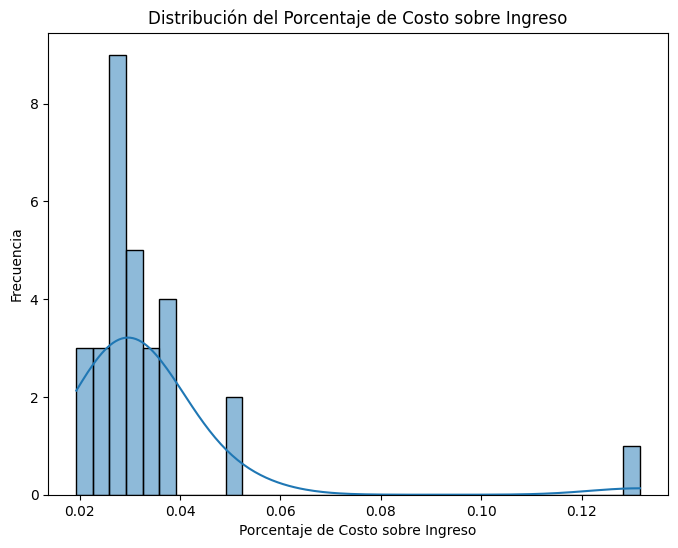

In [70]:
# Histogram to see the distribution
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['porcentaje_costo_sobre_ingreso'], kde=True)
plt.title('Distribución del Porcentaje de Costo sobre Ingreso')
plt.xlabel('Porcentaje de Costo sobre Ingreso')
plt.ylabel('Frecuencia')
plt.show()

##ETAPA 3: Estadística Descriptiva:

In [71]:
resumen_prod.head(2)

,producto,ingreso_total,unidades,precio_promedio,registros,total_acumulado,total_general,porcentaje_acumulado
19,Lámpara De Mesa,82276.38,1112,72.720625,176,82276.38,1467093.52,5.61
3,Auriculares,74175.58,958,76.302727,143,156451.96,1467093.52,10.66


In [84]:
# copia de resumen_prod con las columna que me interesan
df_prod = resumen_prod.iloc[:,:-3].copy()
df_prod.head()

,producto,ingreso_total,unidades,precio_promedio,registros
19,Lámpara De Mesa,82276.38,1112,72.720625,176
3,Auriculares,74175.58,958,76.302727,143
20,Microondas,72562.89,912,79.176000,135
5,Cafetera,59607.31,765,79.046581,117
9,Cuadro Decorativo,54297.6,726,74.578000,100


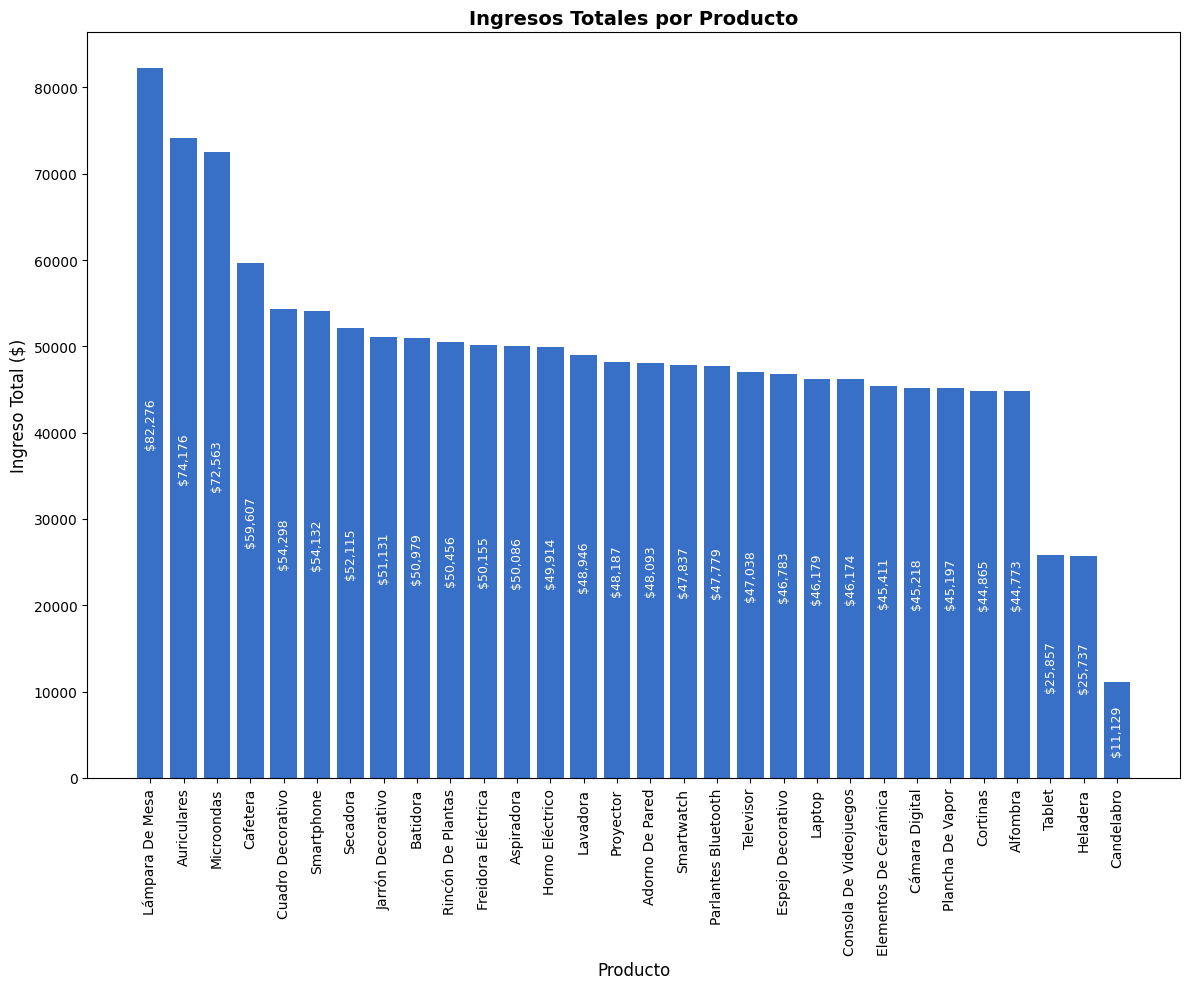

In [86]:

# =========================================
# 📊 Gráfico de barras con etiquetas verticales dentro de cada barra
# =========================================

# Importamos la librería de gráficos matplotlib
import matplotlib.pyplot as plt

# Ordenamos el DataFrame por la columna "ingreso_total" de mayor a menor
# Esto permite que las barras se muestren ordenadas por el monto de ventas
df_ordenado_prod = df_prod.sort_values("ingreso_total", ascending=False)

# Creamos la figura donde se va a dibujar el gráfico
# figsize define el tamaño del gráfico (ancho, alto) en pulgadas
plt.figure(figsize=(12, 10))

# Definimos un color celeste agradable para las barras
color_celeste = "#386FC7"

# Creamos las barras del gráfico
# Eje X → nombre de producto
# Eje Y → ingreso total
# color=color_celeste aplica el color definido arriba
barras = plt.bar(df_ordenado_prod["producto"], df_ordenado_prod["ingreso_total"], color=color_celeste)

# Agregamos un título al gráfico con tamaño de fuente 14 y en negrita
plt.title("Ingresos Totales por Producto", fontsize=14, weight="bold")

# Etiquetamos los ejes
plt.xlabel("Producto", fontsize=12)        # Eje X
plt.ylabel("Ingreso Total ($)", fontsize=12)  # Eje Y

# Rotamos las etiquetas del eje X para que los nombres de los productos se lean bien
plt.xticks(rotation=90)

# Recorremos cada barra dibujada para agregar el valor de ingreso dentro de ella
for barra in barras:
    # Obtenemos la altura de la barra (equivale al valor de ingreso_total)
    y = barra.get_height()
    x = barra.get_x() + barra.get_width() / 2
    # Escribimos el texto dentro de la barra
    plt.text(
        x,                                      # posición horizontal: centro de la barra
        y / 2,                                  # posición vertical: mitad de la barra
        f"${y:,.0f}",                           # texto formateado con separador de miles
        ha='center',                            # alineación horizontal centrada
        va='center',                            # alineación vertical centrada
        fontsize=9,                             # tamaño de fuente pequeño
        color="white",                          # texto blanco para contrastar con el celeste
        rotation=90                             # rotamos el texto 90° para que quede vertical
    )

# Ajustamos automáticamente los márgenes del gráfico para que no se corte nada
plt.tight_layout()

# Mostramos el gráfico final
plt.show()



##GRAFICO DE RESUMEN POR CATEGORIA

In [82]:
ventas_cat.head(10)

,categoria,ingreso_total,unidades,precio_promedio,registros,ticket_promedio_por_venta
1,Electrodomésticos,505299.63,6592,76.52096,1000,505.29963
2,Electrónica,482577.8,6413,75.25492,998,483.54489
0,Decoración,479216.09,6490,74.09800,1000,479.21609


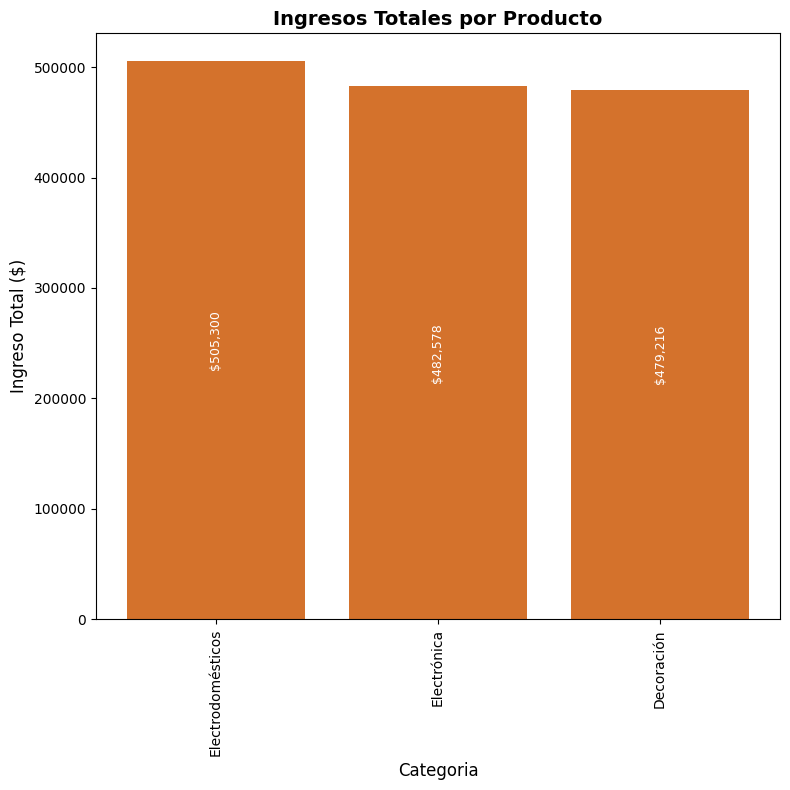

In [87]:
# el df que obtuvimos arriba resumen_cat, tiene un agrupado por categoria con ingreso_total por categoria realizamos un grafico

df_cat = ventas_cat.copy()
# =========================================
# 📊 Gráfico de barras con etiquetas verticales dentro de cada barra
# =========================================

# Importamos la librería de gráficos matplotlib
import matplotlib.pyplot as plt

# Ordenamos el DataFrame por la columna "ingreso_total" de mayor a menor
# Esto permite que las barras se muestren ordenadas por el monto de ventas
df_ordenado_cat = df_cat.sort_values("ingreso_total", ascending=False)

# Creamos la figura donde se va a dibujar el gráfico
# figsize define el tamaño del gráfico (ancho, alto) en pulgadas
plt.figure(figsize=(8, 8))

# Definimos un color celeste agradable para las barras
color_celeste = "#D4722C"

# Creamos las barras del gráfico
# Eje X → nombre de producto
# Eje Y → ingreso total
# color=color_celeste aplica el color definido arriba
barras = plt.bar(df_ordenado_cat["categoria"], df_ordenado_cat["ingreso_total"], color=color_celeste)

# Agregamos un título al gráfico con tamaño de fuente 14 y en negrita
plt.title("Ingresos Totales por Producto", fontsize=14, weight="bold")

# Etiquetamos los ejes
plt.xlabel("Categoria", fontsize=12)        # Eje X
plt.ylabel("Ingreso Total ($)", fontsize=12)  # Eje Y

# Rotamos las etiquetas del eje X para que los nombres de los productos se lean bien
plt.xticks(rotation=90)

# Recorremos cada barra dibujada para agregar el valor de ingreso dentro de ella
for barra in barras:
    # Obtenemos la altura de la barra (equivale al valor de ingreso_total)
    y = barra.get_height()

    # Escribimos el texto dentro de la barra
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # posición horizontal: centro de la barra
        y / 2,                                  # posición vertical: mitad de la barra
        f"${y:,.0f}",                           # texto formateado con separador de miles
        ha='center',                            # alineación horizontal centrada
        va='center',                            # alineación vertical centrada
        fontsize=9,                             # tamaño de fuente pequeño
        color="white",                          # texto blanco para contrastar con el celeste
        rotation=90                             # rotamos el texto 90° para que quede vertical
    )

# Ajustamos automáticamente los márgenes del gráfico para que no se corte nada
plt.tight_layout()

# Mostramos el gráfico final
plt.show()

Medidas de tendencia central de precio por cantidad

* Media: promedio general.
* Mediana: valor central de los datos ordenados.
* Moda: valor que más se repite. (variables continuas no tienen moda)


In [90]:
df_prod['ingreso_total'].describe()

,ingreso_total
count,30.0
mean,48903.117333
std,13265.561715
min,11128.8
25%,45601.92
50%,48140.245
75%,51092.96
max,82276.38


In [93]:
media = df_prod['ingreso_total'].mean()
mediana = df_prod['ingreso_total'].median()



In [97]:
# para la moda como es continua vamos a hacer grupos
df_prod['grupos_ventas'] = (pd.cut(df_prod['ingreso_total'], bins=[0, 10000,20000,30000,40000,50000,60000,70000,80000,90000],
                                   labels=['0-10 mil','10-20 mil','20-30 mil','30-40 mil','40-50 mil','50-60 mil','60-70 mil','70-80 mil','80-90 mil'] ))
moda = df_prod['grupos_ventas'].mode()



In [98]:
df_prod['grupos_ventas'].value_counts()

,count
grupos_ventas,
40-50 mil,15
50-60 mil,9
70-80 mil,2
20-30 mil,2
80-90 mil,1
10-20 mil,1
0-10 mil,0
30-40 mil,0
60-70 mil,0


In [101]:

print("Media:", media)
print("Mediana:", mediana)
print("Moda:", moda)


Media: 48903.117333333335
Mediana: 48140.244999999995
Moda: 0    40-50 mil
Name: grupos_ventas, dtype: category
Categories (9, object): ['0-10 mil' < '10-20 mil' < '20-30 mil' < '30-40 mil' ... '50-60 mil' <
                         '60-70 mil' < '70-80 mil' < '80-90 mil']


### grafico de las medidas de tendencia central de las ventas totales por productos

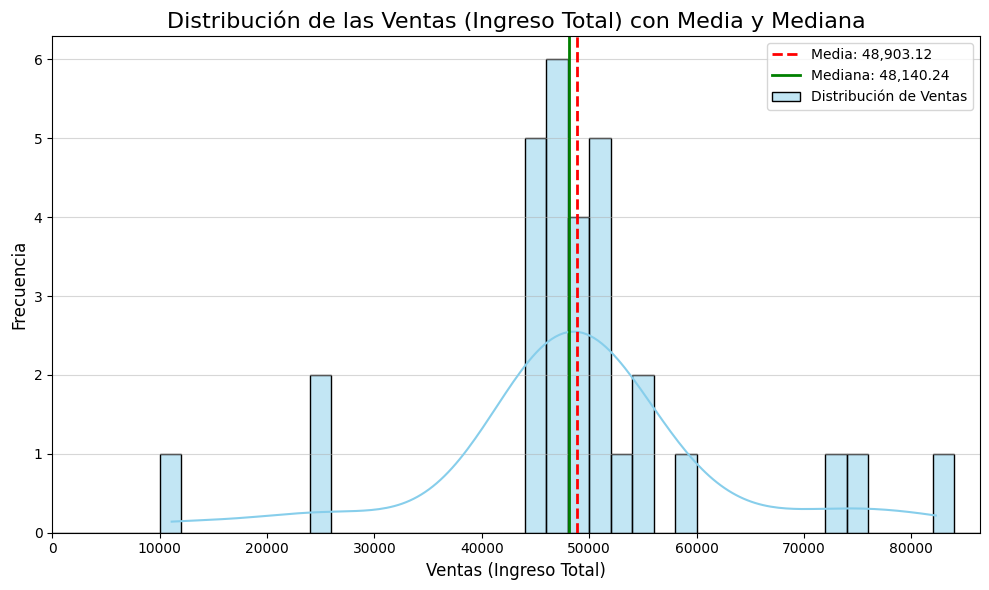

In [109]:
# Histogram to see the distribution

# --- CREACIÓN Y PERSONALIZACIÓN DEL HISTOGRAMA ---
plt.figure(figsize=(10, 6)) # Aumento el tamaño para mejor visualización.

# 1. Histograma (Distribución de las ventas)
sns.histplot(df_prod['ingreso_total'],
             bins=range(0, 100000, 2000), # Uso range() para bins: más limpio y fácil de ajustar.
             kde=True,
             color='skyblue', # Color para el histograma
             edgecolor='black', # Borde para las barras
             label='Distribución de Ventas')

# --- ADICIÓN DE LA MEDIA Y LA MEDIANA ---

# 2. Media (Línea de color rojo)
plt.axvline(media,
            color='red',
            linestyle='--',
            linewidth=2,
            label=f'Media: {media:,.2f}') # Agrego la media con formato y etiqueta

# 3. Mediana (Línea de color verde)
plt.axvline(mediana,
            color='green',
            linestyle='-',
            linewidth=2,
            label=f'Mediana: {mediana:,.2f}') # Agrego la mediana con formato y etiqueta

# --- AJUSTES FINALES DEL GRÁFICO ---
plt.title('Distribución de las Ventas (Ingreso Total) con Media y Mediana', fontsize=16)
plt.xlabel('Ventas (Ingreso Total)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend() # Muestra las etiquetas de la media y la mediana
plt.grid(axis='y', alpha=0.5) # Rejilla sutil en el eje Y
plt.xlim(0, max(df_prod['ingreso_total']) * 1.05) # Ajusta el límite del eje X
plt.tight_layout() # Ajusta automáticamente los parámetros de la subtrama para dar a los artistas un ajuste apretado
plt.show()

con este grafico podemos ver como los outliers afentan las medidas de tendencia central.

la mas robusta es la moda, luego la mediana y la mas afectada es la media.

de todas maneras podemos observar que las ventas centrales por productos estan entre 45000  y 55000.



####Medidas de dispersión:

In [115]:
rango = df_prod['ingreso_total'].max() - df_prod['ingreso_total'].min()
varianza = df_prod['ingreso_total'].var(ddof=1)
desviacion = df_prod['ingreso_total'].std(ddof=1)
coeficiente_variacion = (desviacion / media) * 100



print("Rango:", rango)
print("Varianza:", varianza)
print("Desviación estándar:", desviacion)
print("Coeficiente de variación:", coeficiente_variacion)

Rango: 71147.58
Varianza: 175975127.6254547
Desviación estándar: 13265.561715413889
Coeficiente de variación: 27.126208795634017


* los datos tienen un rango de varianza de 71147
* la variacion estandart es decir en la misma unidad de medida es de 13235
* y el coeficiente de variacion (medida comparable contra otros distribuciones) es de 27.


podemos concluir: si bien los productos centrales generan ingresos entre 45 mil y 55 mil. tambien tienen un rango de dispersion de 71000, por lo cual podemos encontrar en menor medida productos con ingresos mayores a la media e inferiores.

In [116]:
q1 = df_prod['ingreso_total'].quantile(0.25)
q2 = df_prod['ingreso_total'].quantile(0.5)
q3 = df_prod['ingreso_total'].quantile(0.75)
iqr = q3 - q1

print("Q1:", q1)
print("Mediana (Q2):", q2)
print("Q3:", q3)
print("IQR:", iqr)

Q1: 45601.92
Mediana (Q2): 48140.244999999995
Q3: 51092.96
IQR: 5491.040000000001


In [120]:
lim_inf = round(q1 - 1.5 * iqr,2)
lim_sup = round(q3 + 1.5 * iqr,2)

print("Límite inferior:", lim_inf)
print("Límite superior:", lim_sup)

Límite inferior: 37365.36
Límite superior: 59329.52


In [121]:


outliers = df_prod[(df_prod['ingreso_total'] < lim_inf) | (df_prod['ingreso_total'] > lim_sup)]

print("Límite inferior:", lim_inf)
print("Límite superior:", lim_sup)
print("\nOutliers detectados:")
display(outliers)

Límite inferior: 37365.36
Límite superior: 59329.52

Outliers detectados:


,producto,ingreso_total,unidades,precio_promedio,registros,grupos_ventas
19,Lámpara De Mesa,82276.38,1112,72.720625,176,80-90 mil
3,Auriculares,74175.58,958,76.302727,143,70-80 mil
20,Microondas,72562.89,912,79.176000,135,70-80 mil
5,Cafetera,59607.31,765,79.046581,117,50-60 mil
28,Tablet,25856.57,374,71.382586,58,20-30 mil
14,Heladera,25736.8,330,74.127708,48,20-30 mil
6,Candelabro,11128.8,160,74.595417,24,10-20 mil


##ETAPA 3: Análisis Exploratorio de Datos (EDA)

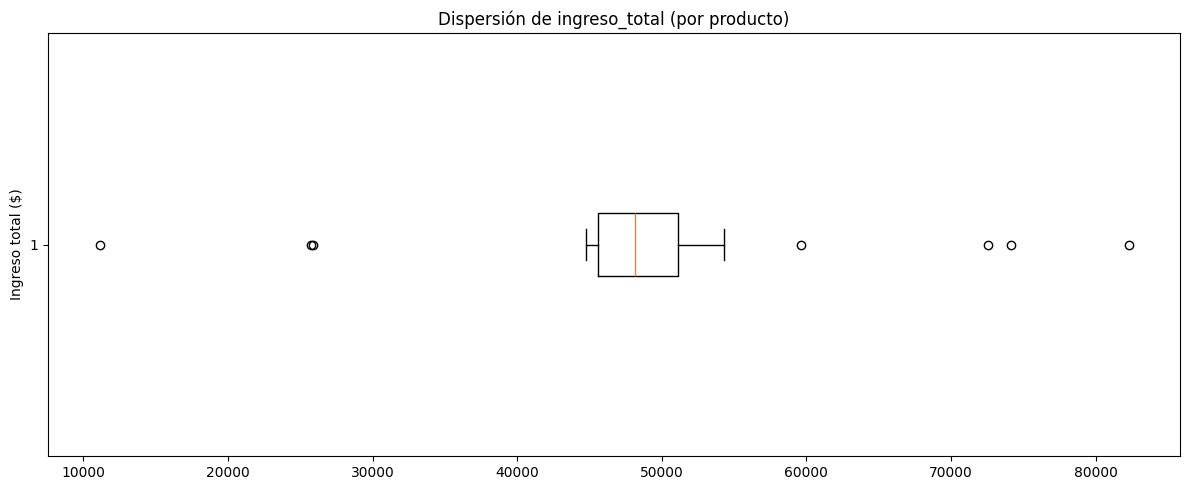

In [127]:

# =========================================
# 📦 Boxplot: dispersión de ingreso_total (por producto)
# =========================================

import matplotlib.pyplot as plt  # importamos matplotlib



plt.figure(figsize=(12, 5))                     # tamaño del gráfico
plt.boxplot(df_prod['ingreso_total'], vert=False)                   # dibujamos boxplot vertical
plt.title('Dispersión de ingreso_total (por producto)')  # título
plt.ylabel('Ingreso total ($)')                # etiqueta del eje Y
plt.tight_layout()                              # ajustar márgenes
plt.show()

### correlacion

In [143]:
from matplotlib.typing import CoordsBaseType

corr_val = df_prod.select_dtypes(include=np.number).corr()



print(corr_val)


                 ingreso_total  unidades  precio_promedio  registros
ingreso_total         1.000000  0.990684         0.326746   0.974326
unidades              0.990684  1.000000         0.216834   0.986616
precio_promedio       0.326746  0.216834         1.000000   0.194309
registros             0.974326  0.986616         0.194309   1.000000


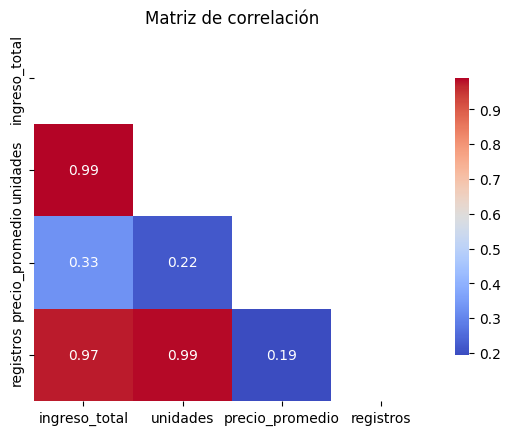

In [146]:
# graficar la matriz de correlacion
# CREAR LA MÁSCARA ---
# np.triu() (Triangle Upper) crea una matriz booleana con 'True' en la diagonal
# superior y 'False' en la diagonal inferior.
# Los valores 'True' en la máscara ocultan las celdas en el heatmap.
mask = np.triu(np.ones_like(corr_val, dtype=bool))

sns.heatmap(
    corr_val,           # El DataFrame con los valores de correlación
    mask=mask,          # Aplicamos la máscara para ocultar la diagonal superior
    annot=True,         # Muestra los valores de correlación en las celdas
    cmap='coolwarm',    # Mapa de color
    fmt=".2f",          # Formato de dos decimales
    cbar_kws={"shrink": .75} # Ajusta el tamaño de la barra de color
)

plt.title('Matriz de correlación')
plt.show()

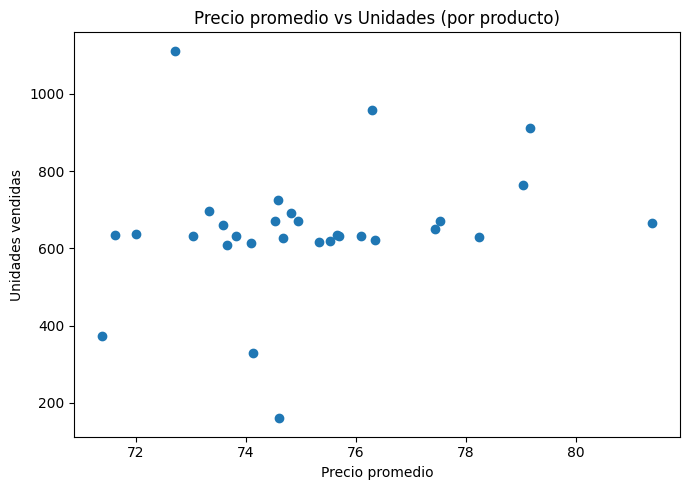

In [128]:

# =========================================
# 🔵 Dispersión: precio_promedio vs unidades (por producto)
# =========================================

import matplotlib.pyplot as plt  # importamos matplotlib

x = df_prod['precio_promedio']  # eje X: precio promedio por producto
y = df_prod['unidades']         # eje Y: unidades vendidas por producto

plt.figure(figsize=(7, 5))           # tamaño del gráfico
plt.scatter(x, y)                    # gráfico de puntos
plt.title('Precio promedio vs Unidades (por producto)')  # título
plt.xlabel('Precio promedio')        # etiqueta eje X
plt.ylabel('Unidades vendidas')      # etiqueta eje Y
plt.tight_layout()                   # ajustar márgenes
plt.show()                           # mostrar


In [129]:

# =========================================
# 📌 Coeficiente de correlación (precio_promedio vs unidades)
# =========================================

# Calculamos el coeficiente de correlación de Pearson con pandas (método corr)
corr_val = df_prod[['precio_promedio','unidades']].corr().loc['precio_promedio','unidades']

print(f"Coeficiente de correlación (Pearson): {corr_val:.3f}")
# Interpretación simple:
if corr_val > 0.5:
    print("Interpretación: relación positiva clara (a mayor precio_promedio, suelen venderse más unidades).")
elif corr_val > 0.2:
    print("Interpretación: relación positiva débil a moderada.")
elif corr_val < -0.5:
    print("Interpretación: relación negativa clara (a mayor precio_promedio, suelen venderse menos unidades).")
elif corr_val < -0.2:
    print("Interpretación: relación negativa débil a moderada.")
else:
    print("Interpretación: relación muy débil o nula.")

Coeficiente de correlación (Pearson): 0.217
Interpretación: relación positiva débil a moderada.


la correlacion fuerte la marca las cantidades vendidas con el ingreso total.

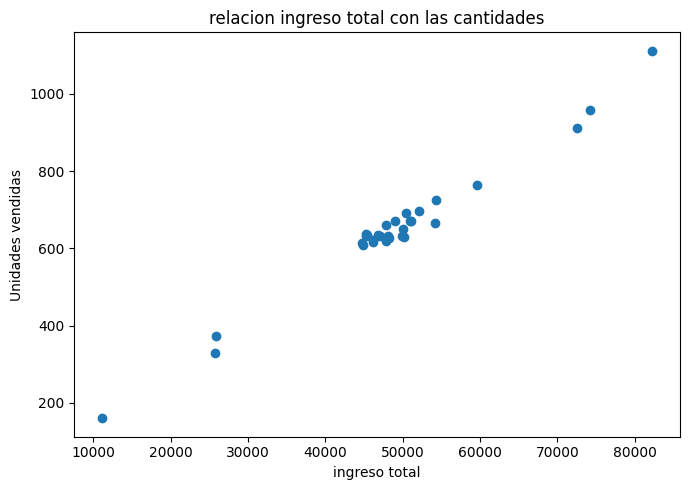

In [148]:
x = df_prod['ingreso_total']  # eje X: precio promedio por producto
y = df_prod['unidades']         # eje Y: unidades vendidas por producto

plt.figure(figsize=(7, 5))           # tamaño del gráfico
plt.scatter(x, y)                    # gráfico de puntos
plt.title('relacion ingreso total con las cantidades')  # título
plt.xlabel('ingreso total')        # etiqueta eje X
plt.ylabel('Unidades vendidas')      # etiqueta eje Y
plt.tight_layout()                   # ajustar márgenes
plt.show()

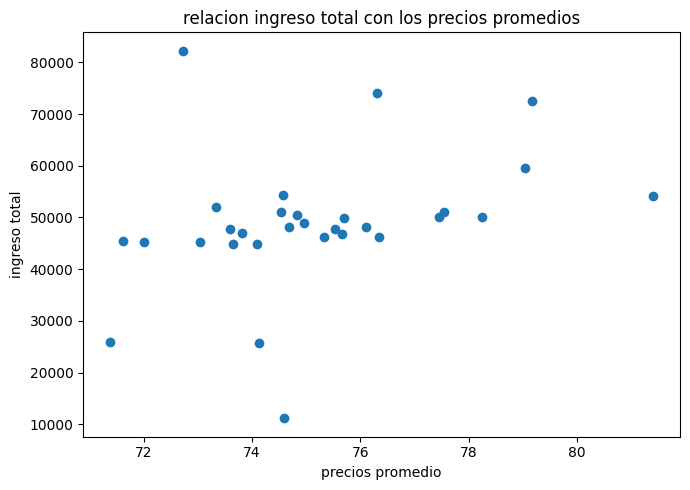

In [150]:
y = df_prod['ingreso_total']  # eje X: precio promedio por producto
x = df_prod['precio_promedio']         # eje Y: unidades vendidas por producto

plt.figure(figsize=(7, 5))           # tamaño del gráfico
plt.scatter(x, y)                    # gráfico de puntos
plt.title('relacion ingreso total con los precios promedios')  # título
plt.xlabel('precios promedio')        # etiqueta eje X
plt.ylabel('ingreso total')      # etiqueta eje Y
plt.tight_layout()                   # ajustar márgenes
plt.show()

Visualización con Matplotlib

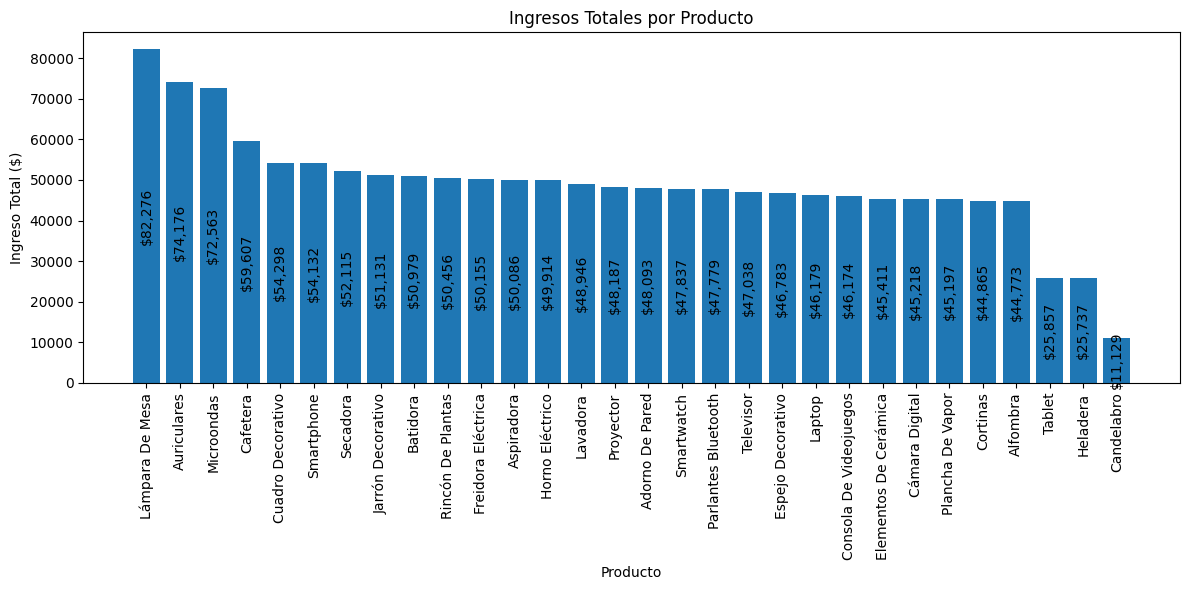

In [151]:
# =========================================
# 📊 Barras: ingresos por producto (Matplotlib, comentado línea por línea)
# =========================================

import matplotlib.pyplot as plt  # importamos la librería de gráficos

df = df_prod.copy()                                # copiamos para no modificar el original
df_ordenado = df.sort_values('ingreso_total', ascending=False)  # ordenamos desc por ingreso

plt.figure(figsize=(12, 6))                             # tamaño del gráfico
barras = plt.bar(df_ordenado['producto'], df_ordenado['ingreso_total'])  # dibujamos las barras

plt.title('Ingresos Totales por Producto')              # título del gráfico
plt.xlabel('Producto')                                  # etiqueta eje X
plt.ylabel('Ingreso Total ($)')                         # etiqueta eje Y
plt.xticks(rotation=90)                                  # rotamos etiquetas del eje X para legibilidad

# Etiquetamos el valor dentro de cada barra (texto vertical)
for b in barras:
    h = b.get_height()                                  # altura de la barra (valor)
    x_c = b.get_x() + b.get_width()/2                   # centro horizontal de la barra
    plt.text(x_c, h/2, f"${h:,.0f}", ha='center', va='center', rotation=90)  # texto dentro, vertical

plt.tight_layout()                                      # ajustar márgenes
plt.show()                                              # mostrar gráfico


In [155]:
resumen_prod_2.head(20)

,año,mes,total_ventas,como %
0,2024,1,129604.99,8.83
1,2024,2,118672.44,8.09
2,2024,3,136779.15,9.32
3,2024,4,128430.69,8.75
4,2024,5,143727.25,9.8
5,2024,6,108480.17,7.39
6,2024,7,116229.97,7.92
7,2024,8,119680.15,8.16
8,2024,9,115787.85,7.89
9,2024,10,112117.13,7.64


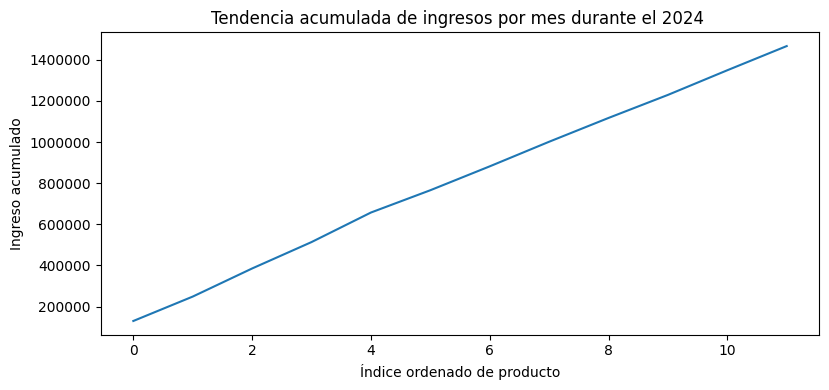

In [168]:

pd.set_option('display.float_format', '{:.2f}'.format)

## ventas acumuladas a travez del año

valores = resumen_prod_2['total_ventas']
acum = np.cumsum(valores)                                     # acumulado simple (ejemplo)

plt.figure(figsize=(8, 4))   # tamaño del gráfico
plt.plot(acum)               # línea simple
plt.title('Tendencia acumulada de ingresos por mes durante el 2024 ')
plt.xlabel('Índice ordenado de producto')
plt.ylabel('Ingreso acumulado')
plt.tight_layout()

# --- SOLUCIÓN: DESACTIVAR LA NOTACIÓN CIENTÍFICA EN EL EJE Y ---
# 1. Obtener el objeto de los ejes
ax = plt.gca()

# 2. Configurar el formato para el eje Y
# Desactiva el uso de un offset y la notación científica.
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_useOffset(False)


plt.show()

### Visualización Avanzada con Seaborn

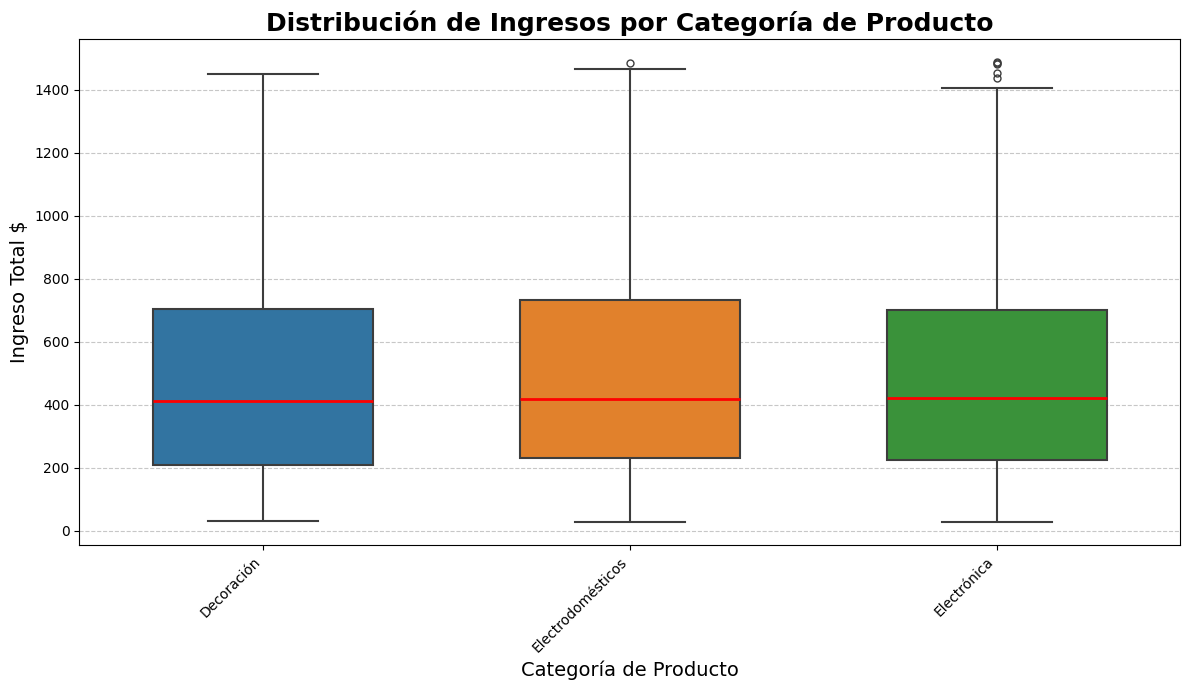

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker # Para formatear los ejes



plt.figure(figsize=(12, 7)) # Tamaño más grande y panorámico para categorías

# 1. Crear el Boxplot Personalizado
sns.boxplot(
    data=ventas_perf,
    x='categoria',
    y='ingreso',
    hue='categoria',     # Elegimos un esquema de color moderno
    width=0.6,             # Ancho de las cajas
    fliersize=5,           # Tamaño de los outliers
    linewidth=1.5,         # Grosor de la línea de la caja
    medianprops={'color': 'red', 'linewidth': 2} # Resaltar la Mediana en rojo
)

# 2. Títulos y Etiquetas
plt.title('Distribución de Ingresos por Categoría de Producto', fontsize=18, fontweight='bold')
plt.xlabel('Categoría de Producto', fontsize=14)
plt.ylabel('Ingreso Total $', fontsize=14)

plt.xticks(rotation=45, ha='right')

# 5. Estilo y Layout
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadir rejilla solo en Y para mejor lectura de ingresos
plt.tight_layout() # Asegura que las etiquetas no se corten
plt.show()



In [171]:
ventas_perf = ventas_perf.sort_values('categoria', ascending=False)


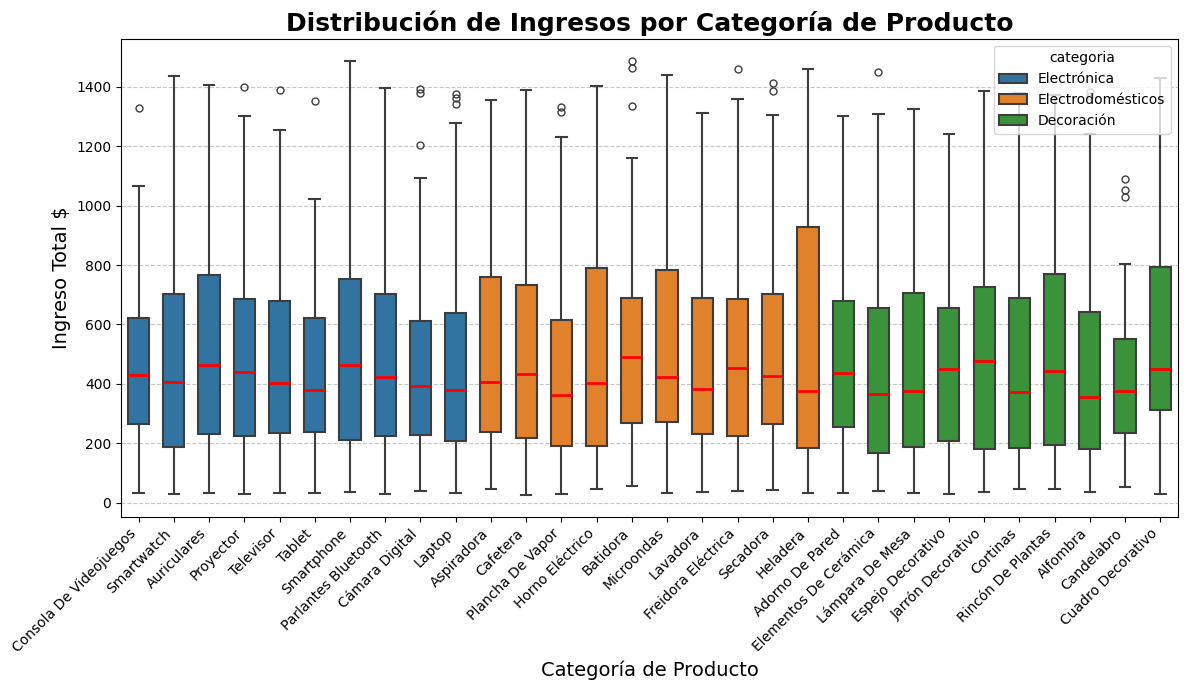

In [172]:

plt.figure(figsize=(12, 7)) # Tamaño más grande y panorámico para categorías

# 1. Crear el Boxplot Personalizado
sns.boxplot(
    data=ventas_perf,
    x='producto',
    y='ingreso',
    hue='categoria',     # Elegimos un esquema de color moderno
    width=0.6,             # Ancho de las cajas
    fliersize=5,           # Tamaño de los outliers
    linewidth=1.5,         # Grosor de la línea de la caja
    medianprops={'color': 'red', 'linewidth': 2} # Resaltar la Mediana en rojo
)

# 2. Títulos y Etiquetas
plt.title('Distribución de Ingresos por Categoría de Producto', fontsize=18, fontweight='bold')
plt.xlabel('Categoría de Producto', fontsize=14)
plt.ylabel('Ingreso Total $', fontsize=14)

plt.xticks(rotation=45, ha='right')

# 5. Estilo y Layout
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadir rejilla solo en Y para mejor lectura de ingresos
plt.tight_layout() # Asegura que las etiquetas no se corten
plt.show()

los archivos utilizados

https://drive.google.com/file/d/12J4AL1f34xbVnXizyiuSWc-hBHz2o2SU/view?usp=drive_link

https://drive.google.com/file/d/1weBzJhPezQ_fgDK432vV9tEV76cwYZLa/view?usp=drive_link

https://drive.google.com/file/d/1NkPmgGKaPWPqpfeZ-WYfHCUKVPIzPtE6/view?usp=drive_link